In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from random import uniform
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
def sinal(x, y):
    if x*pesos[0] + y*pesos[1] + pesos[2]*1 >= 0:
        return 1
    return -1
    
def aprendizado(tupla):
    sin = sinal(tupla[0], tupla[1])
    if sin != tupla[2]: 
        global pesos
        pesos = pd.Series(pesos) + 0.2*(tupla[2] - sin)*pd.Series([tupla[0], tupla[1], 1])

def figura(x): 
    return -(pesos[0]*x)/pesos[1] - pesos[2]/pesos[1]

In [29]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2)
x1 = np.hsplit(X,2)[0].reshape(1, len(np.hsplit(X,2)[0]))[0]
x2 = np.hsplit(X,2)[1].reshape(1, len(np.hsplit(X,2)[0]))[0]
y[y == 0] = -1

pd.DataFrame(zip(x1, x2, y), columns = ['x1', 'x2', 'classe'])

,x1,x2,classe
0,1.626911,0.500434,-1
1,-2.571449,7.278367,1
2,-2.754297,7.471673,1
3,-2.713914,7.193052,1
4,-2.384287,-1.437951,-1


Pesos finais:   [0.387, 1.207, -4.28]


(-3.0, 9.0)

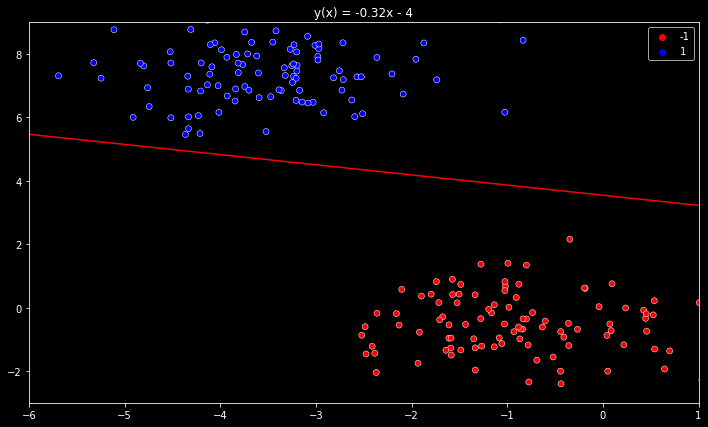

In [34]:
global pesos
pesos = pd.Series([uniform(-1, 1), uniform(-1, 1), uniform(-1, 1)]) # pesos iniciais do exemplo
print(f'Pesos iniciais: {list(round(pesos, 3))}')

for k in range(500): 
    for i in range(len(X)): 
        aprendizado((X[i][0], X[i][1], y[i])) 

print(f'Pesos finais:   {list(round(pesos, 3))}') # a*x1 + b*x2 + c = 0
lista = pd.DataFrame([(i, figura(i)) for i in range(int(round(min(x1))), int(round(max(x1))))])
plt.figure(figsize=(12, 7))
plt.style.use('dark_background')
sns.scatterplot(x = x1, y = x2, hue = y, palette = {1:'blue', -1:'red'})
plt.plot(lista[0], lista[1], color = 'r')
plt.title(f'y(x) = {round(-pesos[0]/pesos[1], 2)}x - {abs(round(pesos[2]/pesos[1]))}')
plt.xlim(int(round(min(x1))), int(round(max(x1)))-1)
plt.ylim(int(round(min(x2))), int(round(max(x2)))-1)